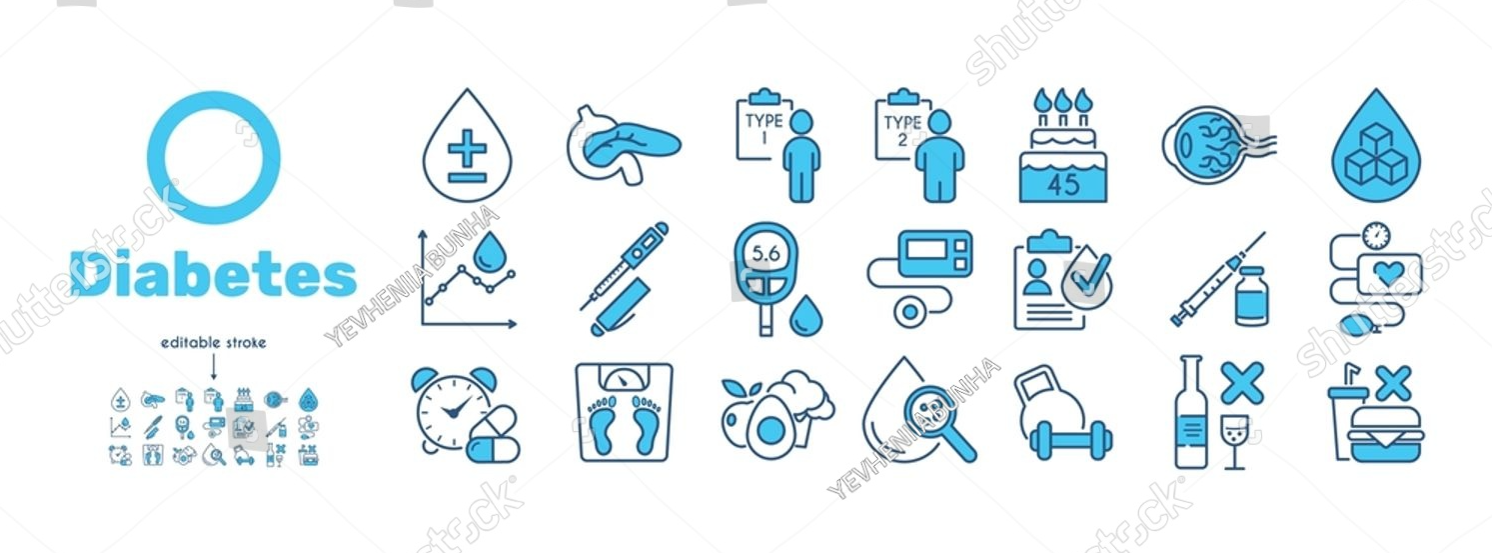

<div class="inner_cell" style="text-align:center;">
  <div class="text_cell_render border-box-sizing rendered_html">
    <p></p>
    <div class="list-group" id="list-tab" role="tablist" style="display:inline-block; text-align:left;">
      <h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home" style="border:2px solid #FF780F;background-color:#FF780F; color:white; font-family:Verdana;text-align: center; font-size:140%;font-weight: Bold;">Notebook Content</h3>
      <a class="list-group-item list-group-item-action" data-toggle="list" href="#1" role="tab" aria-controls="profile" target="_self" style="display:block; color:#FF780F; font-family:Verdana;text-align: center; font-size:130%;font-weight: Bold;">Business Problem</a>
      <a class="list-group-item list-group-item-action" data-toggle="list" href="#2" role="tab" aria-controls="messages" target="_self" style="display:block; color:#FF780F; font-family:Verdana;text-align: center; font-size:130%;font-weight: Bold;">Dataset Story</a>
      <a class="list-group-item list-group-item-action" data-toggle="list" href="#3" role="tab" aria-controls="messages" target="_self" style="display:block; color:#FF780F; font-family:Verdana;text-align: center; font-size:130%;font-weight: Bold;">Exploratory Data Analysis (EDA)</a>
      <a class="list-group-item list-group-item-action" data-toggle="list" href="#4" role="tab" aria-controls="messages" target="_self" style="display:block; color:#FF780F; font-family:Verdana;text-align: center; font-size:130%;font-weight: Bold;">Feature Engineering</a>
      <a class="list-group-item list-group-item-action" data-toggle="list" href="#7" role="tab" aria-controls="services" target="_self" 
style="display:block; color:#FF780F; font-family:Verdana;text-align: center; font-size:130%;font-weight: Bold;">Encoding</a>
      <a class="list-group-item list-group-item-action" data-toggle="list" href="#8" role="tab" aria-controls="services" target="_self"
style="display:block; color:#FF780F; font-family:Verdana;text-align: center; font-size:130%;font-weight: Bold;">Standardization</a>
      <a class="list-group-item list-group-item-action" data-toggle="list" href="#9" role="tab" aria-controls="services" target="_self"  
style="display:block; color:#FF780F; font-family:Verdana;text-align: center; font-size:130%;font-weight: Bold;">Model</a>
       <a class="list-group-item list-group-item-action" data-toggle="list" href="#10" role="tab" aria-controls="services" target="_self" 
style="display:block; color:#FF780F; font-family:Verdana;text-align: center; font-size:130%;font-weight: Bold;">Feature Importance</a>
       <a class="list-group-item list-group-item-action" data-toggle="list" href="#10" role="tab" aria-controls="services" target="_self"
   </div>
  </div>
</div>


<h1 style="color:#FF780F;">Business Problem:</h1>

<h5 style = "color:#000000;"> It is desired to develop a machine learning model that can predict whether people have diabetes or not when their characteristics are specified.</h5>
<h5 style = "color:#000000;">You are expected to perform the necessary data analysis and feature engineering steps before developing the model.</h5>

<h1 style="color:#FF780F;">Dataset Story:</h1>

<h5 style="color:#000000;">The data set is part of a larger data set held by the National Institutes of Diabetes-Digestive-Kidney Diseases in the USA.</h5>

<h5 style="color:#000000;">Data used for a diabetes study conducted on Pima Indian women aged 21 and over living in the city of Phoenix, the 5th largest city in the State of Arizona in the USA.</h5>
<h5 style="color:#000000;">The target variable is specified as "Outcome"; 1 indicates a positive diabetes test result, 0 indicates a negative diabetes test result.</h5>
<h5 style="color:#000000;">Pregnancies: Number of pregnancies</h5>
<h5 style="color:#000000;">Glucose: 2-hour plasma glucose concentration in oral glucose tolerance test</h5>
<h5 style="color:#000000;">Blood Pressure: Blood Pressure (diastolic blood pressure) (mm Hg)</h5>
<h5 style="color:#000000;">SkinThickness: Skin Thickness</h5>
<h5 style="color:#000000;">Insulin: 2-hour serum insulin (mu U/ml)</h5>
<h5 style="color:#000000;">DiabetesPedigreeFunction: Function (2-hour plasma glucose concentration in oral glucose tolerance test)</h5>
<h5 style="color:#000000;">BMI: Body mass index</h5>
<h5 style="color:#000000;">Age: Age (years)</h5>
<h5 style="color:#000000;">Outcome: Having the disease (1) or not (0)</h5>

<h1 style="color:#FF780F;">Explaratory Data Analysis (EDA):</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter(action="ignore")

pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv('/kaggle/input/diabetes/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [3]:
# Step 1: Examine the general picture.
def check_df(dataframe, head=5, tail=5, quan=False):
    print('########## Shape ##########')
    print(dataframe.shape)
    print('########## Types ##########')
    print(dataframe.dtypes)
    print('########## Head ##########')
    print(dataframe.head(head))
    print('########## Tail ##########')
    print(dataframe.tail(tail))
    print('########## NA ##########')
    print(dataframe.isnull().sum())
    if quan:
        print('########## Quantiles ##########')
        print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [4]:
check_df(df)

########## Shape ##########
(768, 9)
########## Types ##########
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
########## Head ##########
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0            6      148             72             35        0 33.600   
1            1       85             66             29        0 26.600   
2            8      183             64              0        0 23.300   
3            1       89             66             23       94 28.100   
4            0      137             40             35      168 43.100   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  

In [5]:
# Step 2: Capture numerical and categorical variables.
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [6]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [7]:
cat_cols, num_cols, cat_but_car

# Only the outcome is categorical, the rest of the variables are all numerical and there isn't any cardinal variables

(['Outcome'],
 ['Pregnancies',
  'Glucose',
  'BloodPressure',
  'SkinThickness',
  'Insulin',
  'BMI',
  'DiabetesPedigreeFunction',
  'Age'],
 [])

In [8]:
# Step 3: Analyze the numerical and categorical variables.
def cat_summary(dataframe, col_name, plot=False):
   
    # Create a frequency table for the categorical variable
    summary_df = pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                               'Ratio': 100 * dataframe[col_name].value_counts() / len(dataframe)})

    # Print the frequency table
    print(summary_df)
    print('####################')

    # If the plot parameter is True, plot a count plot
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

         Outcome  Ratio
Outcome                
0            500 65.104
1            268 34.896
####################


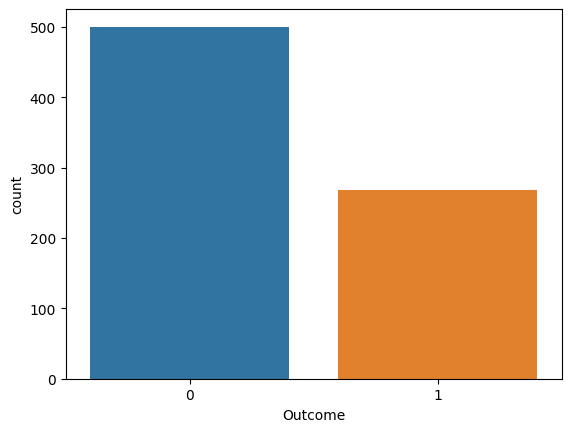

In [9]:
# There is only one categorical variable. let's analyze it
cat_summary(df, 'Outcome',plot=True)

In [10]:
# Analyze numerical cols
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.01, 0.05, 0.10, 0.25, 0.50,  0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

count   768.000
mean      3.845
std       3.370
min       0.000
1%        0.000
5%        0.000
10%       0.000
25%       1.000
50%       3.000
90%       9.000
95%      10.000
99%      13.000
max      17.000
Name: Pregnancies, dtype: float64


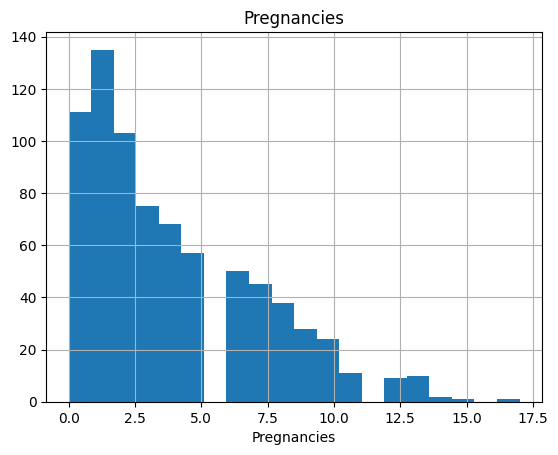

count   768.000
mean    120.895
std      31.973
min       0.000
1%       57.000
5%       79.000
10%      85.000
25%      99.000
50%     117.000
90%     167.000
95%     181.000
99%     196.000
max     199.000
Name: Glucose, dtype: float64


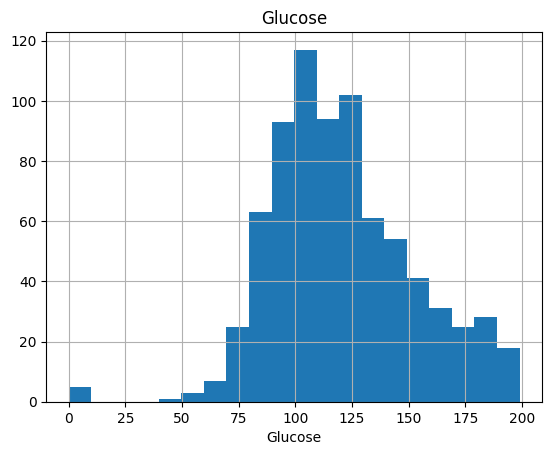

count   768.000
mean     69.105
std      19.356
min       0.000
1%        0.000
5%       38.700
10%      54.000
25%      62.000
50%      72.000
90%      88.000
95%      90.000
99%     106.000
max     122.000
Name: BloodPressure, dtype: float64


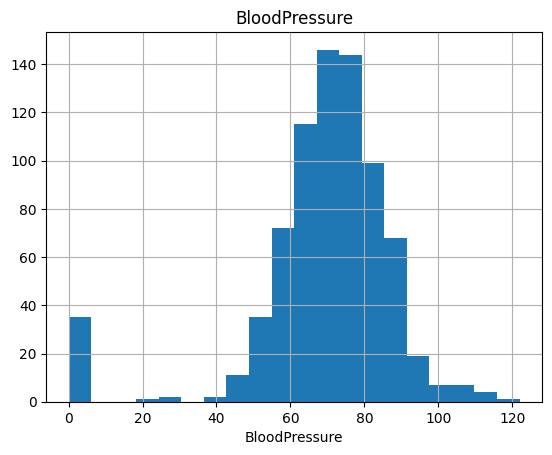

count   768.000
mean     20.536
std      15.952
min       0.000
1%        0.000
5%        0.000
10%       0.000
25%       0.000
50%      23.000
90%      40.000
95%      44.000
99%      51.330
max      99.000
Name: SkinThickness, dtype: float64


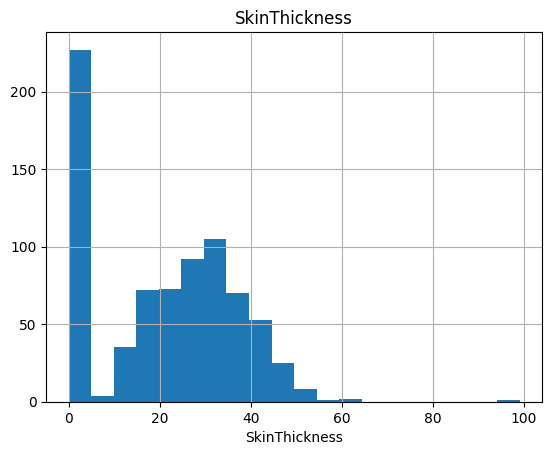

count   768.000
mean     79.799
std     115.244
min       0.000
1%        0.000
5%        0.000
10%       0.000
25%       0.000
50%      30.500
90%     210.000
95%     293.000
99%     519.900
max     846.000
Name: Insulin, dtype: float64


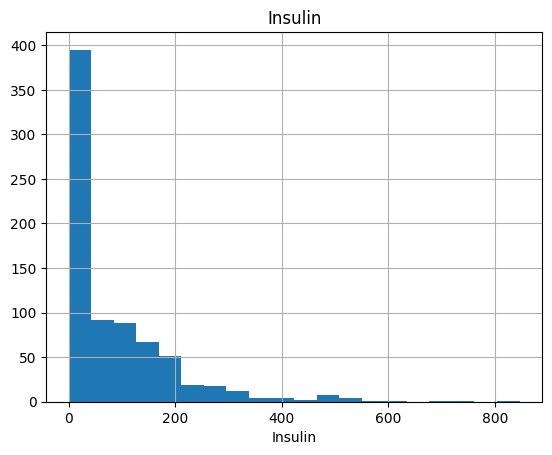

count   768.000
mean     31.993
std       7.884
min       0.000
1%        0.000
5%       21.800
10%      23.600
25%      27.300
50%      32.000
90%      41.500
95%      44.395
99%      50.759
max      67.100
Name: BMI, dtype: float64


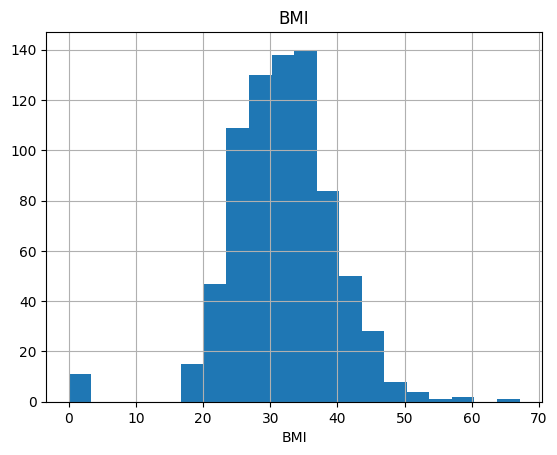

count   768.000
mean      0.472
std       0.331
min       0.078
1%        0.095
5%        0.140
10%       0.165
25%       0.244
50%       0.372
90%       0.879
95%       1.133
99%       1.698
max       2.420
Name: DiabetesPedigreeFunction, dtype: float64


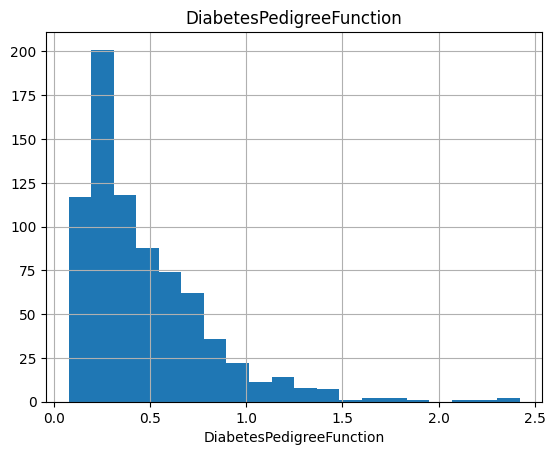

count   768.000
mean     33.241
std      11.760
min      21.000
1%       21.000
5%       21.000
10%      22.000
25%      24.000
50%      29.000
90%      51.000
95%      58.000
99%      67.000
max      81.000
Name: Age, dtype: float64


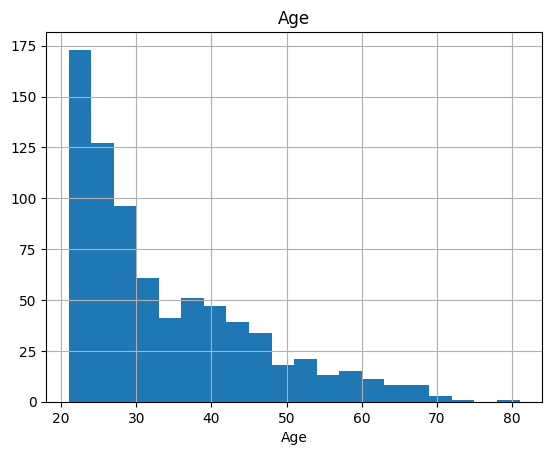

In [11]:
for col in num_cols:
    num_summary(df, col, plot=True)

In [12]:
# Step 4 Analyze the target variable 

# Average of the target variable according to categorical variables,
# Average of the numeric variable according to the target variable

def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({'TARGET_MEAN': dataframe.groupby(categorical_col)[target].mean()}), end='\n\n\n')
# There is only one categorical variable and it is also target variable. So we are not going to use target_summary_with_cat func for this problem
    
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: ['mean', 'median', 'std']}), end='\n\n\n')


In [13]:
for col in num_cols:
    target_summary_with_num(df, 'Outcome', col)

        Pregnancies             
               mean median   std
Outcome                         
0             3.298  2.000 3.017
1             4.866  4.000 3.741


        Glucose               
           mean  median    std
Outcome                       
0       109.980 107.000 26.141
1       141.257 140.000 31.940


        BloodPressure              
                 mean median    std
Outcome                            
0              68.184 70.000 18.063
1              70.825 74.000 21.492


        SkinThickness              
                 mean median    std
Outcome                            
0              19.664 21.000 14.890
1              22.164 27.000 17.680


        Insulin               
           mean median     std
Outcome                       
0        68.792 39.000  98.865
1       100.336  0.000 138.689


           BMI             
          mean median   std
Outcome                    
0       30.304 30.050 7.690
1       35.143 34.250 7.263


        Diabe

In [14]:
# Perform correlation analysis.
def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]

    # Optionally, plot a heatmap
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (10, 6)})
        sns.heatmap(corr, cmap='RdBu', annot=True, fmt='.2f')
        plt.show()

    return drop_list

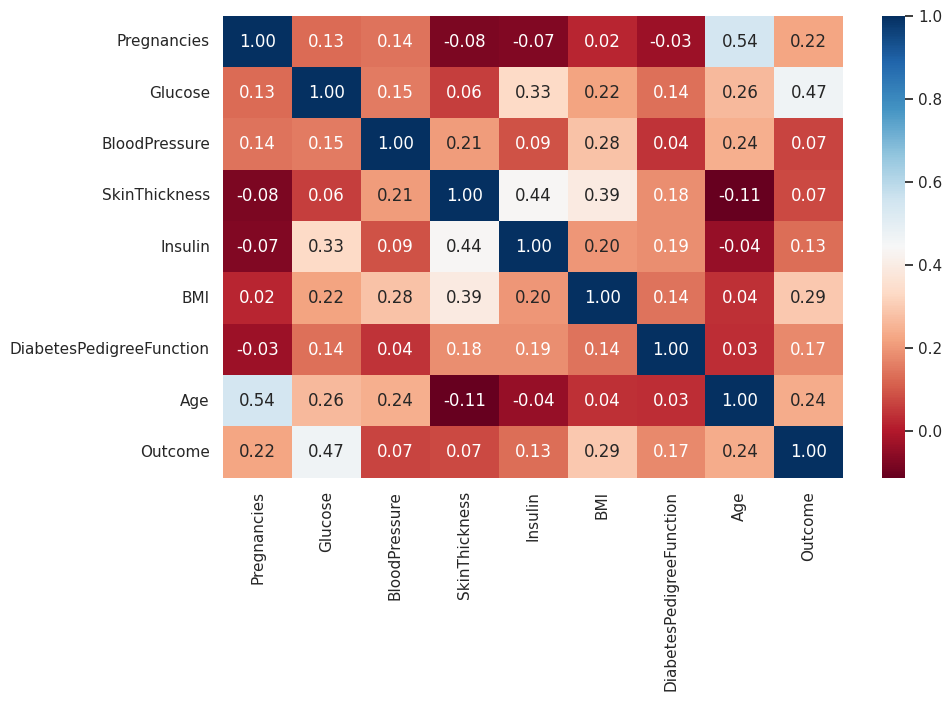

[]

In [15]:
high_correlated_cols(df, plot=True)
# There isn't high correlation between any variables

<h1 style="color:#FF780F;">Setting Up a Baseline Model:</h1>

In [16]:
y = df["Outcome"]
X = df.drop("Outcome", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),3)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")

Accuracy: 0.77
Recall: 0.706
Precision: 0.59
F1: 0.64
Auc: 0.75


<h1 style="color:#FF780F;">Feature Engineering:</h1>

<h4 style = "color:#000000;":>Step 1:
Take necessary actions for missing and outliers. There are no missing observations in the data set, but observation units containing 0 values in variables such as Glucose, Insulin, etc. may represent missing values.</h4>
 
<h4 style = "color:#000000;":>For example; a person's glucose or insulin value cannot be 0. Considering this situation, you can assign the zero values as NaN in the relevant values and then apply the operations to the missing values. </h4>

In [17]:
# Analyze missing values

def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [18]:
missing_values_table(df)
# There is no missing values in the dataset. But there are some zero values in Glucose, Insulin vb. columns. We will deal with them later.

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


In [19]:
zero_columns = [col for col in df.columns if (df[col].min() == 0 and col not in ["Pregnancies", "Outcome"])]
zero_columns

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [20]:
# Let's go to each of the variables with 0 in observation units and replace the observation values containing 0 with NaN
for col in zero_columns:
    df[col] = df[col].replace(0, np.nan)

In [21]:
# Fill missing values with median
for col in zero_columns:
    df.loc[df[col].isnull(), col] = df[col].median()

In [22]:
# Check for missing values again.
missing_values_table(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


In [23]:
# Analyze outliers

#define the functions to be used in outlier analysis
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

    
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

In [24]:
for col in num_cols:
    print(col, check_outlier(df, col))

Pregnancies True
Glucose False
BloodPressure True
SkinThickness True
Insulin True
BMI True
DiabetesPedigreeFunction True
Age True


In [25]:
#  Let's replace outliers with threshold values
for col in num_cols:
    replace_with_thresholds(df, col)

In [26]:
# Check again for outliers
for col in num_cols:
    print(col, check_outlier(df, col))

#There are no outliers anymore.

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin False
BMI False
DiabetesPedigreeFunction False
Age False


<h4 style = "color:#000000;":> Step 2: Create new variables .</h4>

In [27]:
# Categorize the age variable and create a new age variable
df.loc[(df["Age"] >= 21) & (df["Age"] < 50), "NEW_AGE_CAT"] = "mature"
df.loc[(df["Age"] >= 50), "NEW_AGE_CAT"] = "senior"
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_AGE_CAT
0,6.000,148.000,72.000,35.000,125.000,33.600,0.627,50.000,1,senior
1,1.000,85.000,66.000,29.000,125.000,26.600,0.351,31.000,0,mature
2,8.000,183.000,64.000,29.000,125.000,23.300,0.672,32.000,1,mature
3,1.000,89.000,66.000,23.000,112.875,28.100,0.167,21.000,0,mature
4,0.000,137.000,40.000,35.000,135.875,43.100,1.200,33.000,1,mature


In [28]:
# BMI below 18.5 is underweight, 18.5 to 24.9 is normal. 25 to 29.9 overweight, 30 and above obese
df['NEW_BMI'] = pd.cut(x=df['BMI'], bins=[0, 18.5, 24.9, 29.9, 100],labels=["Underweight", "Healthy", "Overweight", "Obese"])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_AGE_CAT,NEW_BMI
0,6.000,148.000,72.000,35.000,125.000,33.600,0.627,50.000,1,senior,Obese
1,1.000,85.000,66.000,29.000,125.000,26.600,0.351,31.000,0,mature,Overweight
2,8.000,183.000,64.000,29.000,125.000,23.300,0.672,32.000,1,mature,Healthy
3,1.000,89.000,66.000,23.000,112.875,28.100,0.167,21.000,0,mature,Overweight
4,0.000,137.000,40.000,35.000,135.875,43.100,1.200,33.000,1,mature,Obese


In [29]:
# Converting glucose value to a categorical variable
df["NEW_GLUCOSE"] = pd.cut(x=df["Glucose"], bins=[0, 140, 200, 300], labels=["Normal", "Prediabetes", "Diabetes"])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_AGE_CAT,NEW_BMI,NEW_GLUCOSE
0,6.000,148.000,72.000,35.000,125.000,33.600,0.627,50.000,1,senior,Obese,Prediabetes
1,1.000,85.000,66.000,29.000,125.000,26.600,0.351,31.000,0,mature,Overweight,Normal
2,8.000,183.000,64.000,29.000,125.000,23.300,0.672,32.000,1,mature,Healthy,Prediabetes
3,1.000,89.000,66.000,23.000,112.875,28.100,0.167,21.000,0,mature,Overweight,Normal
4,0.000,137.000,40.000,35.000,135.875,43.100,1.200,33.000,1,mature,Obese,Normal


In [30]:
#Creating a categorical variable by considering age and BMI values together
df.loc[(df["BMI"] < 18.5) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "underweightmature"
df.loc[(df["BMI"] < 18.5) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "underweightsenior"
df.loc[((df["BMI"] >= 18.5) & (df["BMI"] < 25)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "healthymature"
df.loc[((df["BMI"] >= 18.5) & (df["BMI"] < 25)) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "healthysenior"
df.loc[((df["BMI"] >= 25) & (df["BMI"] < 30)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "overweightmature"
df.loc[((df["BMI"] >= 25) & (df["BMI"] < 30)) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "overweightsenior"
df.loc[(df["BMI"] > 18.5) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "obesemature"
df.loc[(df["BMI"] > 18.5) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "obesesenior"
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_AGE_CAT,NEW_BMI,NEW_GLUCOSE,NEW_AGE_BMI_NOM
0,6.000,148.000,72.000,35.000,125.000,33.600,0.627,50.000,1,senior,Obese,Prediabetes,obesesenior
1,1.000,85.000,66.000,29.000,125.000,26.600,0.351,31.000,0,mature,Overweight,Normal,obesemature
2,8.000,183.000,64.000,29.000,125.000,23.300,0.672,32.000,1,mature,Healthy,Prediabetes,obesemature
3,1.000,89.000,66.000,23.000,112.875,28.100,0.167,21.000,0,mature,Overweight,Normal,obesemature
4,0.000,137.000,40.000,35.000,135.875,43.100,1.200,33.000,1,mature,Obese,Normal,obesemature


In [31]:
# Creating a categorical variable by considering age and glucose values together
df.loc[(df["Glucose"] < 70) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "lowmature"
df.loc[(df["Glucose"] < 70) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "lowsenior"
df.loc[((df["Glucose"] >= 70) & (df["Glucose"] < 100)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "normalmature"
df.loc[((df["Glucose"] >= 70) & (df["Glucose"] < 100)) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "normalsenior"
df.loc[((df["Glucose"] >= 100) & (df["Glucose"] <= 125)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "hiddenmature"
df.loc[((df["Glucose"] >= 100) & (df["Glucose"] <= 125)) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "hiddensenior"
df.loc[(df["Glucose"] > 125) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "highmature"
df.loc[(df["Glucose"] > 125) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "highsenior"
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_AGE_CAT,NEW_BMI,NEW_GLUCOSE,NEW_AGE_BMI_NOM,NEW_AGE_GLUCOSE_NOM
0,6.000,148.000,72.000,35.000,125.000,33.600,0.627,50.000,1,senior,Obese,Prediabetes,obesesenior,highsenior
1,1.000,85.000,66.000,29.000,125.000,26.600,0.351,31.000,0,mature,Overweight,Normal,obesemature,normalmature
2,8.000,183.000,64.000,29.000,125.000,23.300,0.672,32.000,1,mature,Healthy,Prediabetes,obesemature,highmature
3,1.000,89.000,66.000,23.000,112.875,28.100,0.167,21.000,0,mature,Overweight,Normal,obesemature,normalmature
4,0.000,137.000,40.000,35.000,135.875,43.100,1.200,33.000,1,mature,Obese,Normal,obesemature,highmature


In [32]:
# Derive Categorical variables with Insulin Value
def set_insulin(dataframe, col_name="Insulin"):
    if 16 <= dataframe[col_name] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [33]:
df['NEW_INSULIN_SCORE'] = df.apply(set_insulin, axis=1)
df["NEW_GLUCOSE*INSULIN"] = df["Glucose"] * df["Insulin"]
df["NEW_GLUCOSE*PREGNANCIES"] = df["Glucose"] * (1+ df["Pregnancies"])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_AGE_CAT,NEW_BMI,NEW_GLUCOSE,NEW_AGE_BMI_NOM,NEW_AGE_GLUCOSE_NOM,NEW_INSULIN_SCORE,NEW_GLUCOSE*INSULIN,NEW_GLUCOSE*PREGNANCIES
0,6.000,148.000,72.000,35.000,125.000,33.600,0.627,50.000,1,senior,Obese,Prediabetes,obesesenior,highsenior,Normal,18500.000,1036.000
1,1.000,85.000,66.000,29.000,125.000,26.600,0.351,31.000,0,mature,Overweight,Normal,obesemature,normalmature,Normal,10625.000,170.000
2,8.000,183.000,64.000,29.000,125.000,23.300,0.672,32.000,1,mature,Healthy,Prediabetes,obesemature,highmature,Normal,22875.000,1647.000
3,1.000,89.000,66.000,23.000,112.875,28.100,0.167,21.000,0,mature,Overweight,Normal,obesemature,normalmature,Normal,10045.875,178.000
4,0.000,137.000,40.000,35.000,135.875,43.100,1.200,33.000,1,mature,Obese,Normal,obesemature,highmature,Normal,18614.875,137.000


In [34]:
# Uppercase columns
df.columns = [col.upper() for col in df.columns]
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,NEW_BMI,NEW_GLUCOSE,NEW_AGE_BMI_NOM,NEW_AGE_GLUCOSE_NOM,NEW_INSULIN_SCORE,NEW_GLUCOSE*INSULIN,NEW_GLUCOSE*PREGNANCIES
0,6.000,148.000,72.000,35.000,125.000,33.600,0.627,50.000,1,senior,Obese,Prediabetes,obesesenior,highsenior,Normal,18500.000,1036.000
1,1.000,85.000,66.000,29.000,125.000,26.600,0.351,31.000,0,mature,Overweight,Normal,obesemature,normalmature,Normal,10625.000,170.000
2,8.000,183.000,64.000,29.000,125.000,23.300,0.672,32.000,1,mature,Healthy,Prediabetes,obesemature,highmature,Normal,22875.000,1647.000
3,1.000,89.000,66.000,23.000,112.875,28.100,0.167,21.000,0,mature,Overweight,Normal,obesemature,normalmature,Normal,10045.875,178.000
4,0.000,137.000,40.000,35.000,135.875,43.100,1.200,33.000,1,mature,Obese,Normal,obesemature,highmature,Normal,18614.875,137.000


<h1 style="color:#FF780F;">Encoding</h1>

In [35]:
# Define the function to be used for encoding operations
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe


def one_hot_encoder(dataframe, categorical_cols, drop_first=False): #var yok
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [36]:
# We created new variables, lets catch the new categorical and numerical columns
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 768
Variables: 17
cat_cols: 7
num_cols: 10
cat_but_car: 0
num_but_cat: 3


In [37]:
# Let's catch binary_cols
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
binary_cols

['NEW_AGE_CAT']

In [38]:
for col in binary_cols:
    df = label_encoder(df, col)

In [39]:
# Update cat_cols
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["OUTCOME"]]
cat_cols

['NEW_AGE_BMI_NOM',
 'NEW_AGE_GLUCOSE_NOM',
 'NEW_INSULIN_SCORE',
 'NEW_BMI',
 'NEW_GLUCOSE']

In [40]:
df = one_hot_encoder(df, cat_cols, drop_first=True)

In [41]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,NEW_GLUCOSE*INSULIN,NEW_GLUCOSE*PREGNANCIES,NEW_AGE_BMI_NOM_obesesenior,NEW_AGE_BMI_NOM_underweightmature,NEW_AGE_GLUCOSE_NOM_hiddensenior,NEW_AGE_GLUCOSE_NOM_highmature,NEW_AGE_GLUCOSE_NOM_highsenior,NEW_AGE_GLUCOSE_NOM_lowmature,NEW_AGE_GLUCOSE_NOM_lowsenior,NEW_AGE_GLUCOSE_NOM_normalmature,NEW_AGE_GLUCOSE_NOM_normalsenior,NEW_BMI_Healthy,NEW_BMI_Overweight,NEW_BMI_Obese,NEW_GLUCOSE_Prediabetes,NEW_GLUCOSE_Diabetes
0,6.000,148.000,72.000,35.000,125.000,33.600,0.627,50.000,1,1,18500.000,1036.000,True,False,False,False,True,False,False,False,False,False,False,True,True,False
1,1.000,85.000,66.000,29.000,125.000,26.600,0.351,31.000,0,0,10625.000,170.000,False,False,False,False,False,False,False,True,False,False,True,False,False,False
2,8.000,183.000,64.000,29.000,125.000,23.300,0.672,32.000,1,0,22875.000,1647.000,False,False,False,True,False,False,False,False,False,True,False,False,True,False
3,1.000,89.000,66.000,23.000,112.875,28.100,0.167,21.000,0,0,10045.875,178.000,False,False,False,False,False,False,False,True,False,False,True,False,False,False
4,0.000,137.000,40.000,35.000,135.875,43.100,1.200,33.000,1,0,18614.875,137.000,False,False,False,True,False,False,False,False,False,False,False,True,False,False


<h1 style="color:#FF780F;">Standardization</h1>

In [42]:
scaler =  StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [43]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,NEW_GLUCOSE*INSULIN,NEW_GLUCOSE*PREGNANCIES,NEW_AGE_BMI_NOM_obesesenior,NEW_AGE_BMI_NOM_underweightmature,NEW_AGE_GLUCOSE_NOM_hiddensenior,NEW_AGE_GLUCOSE_NOM_highmature,NEW_AGE_GLUCOSE_NOM_highsenior,NEW_AGE_GLUCOSE_NOM_lowmature,NEW_AGE_GLUCOSE_NOM_lowsenior,NEW_AGE_GLUCOSE_NOM_normalmature,NEW_AGE_GLUCOSE_NOM_normalsenior,NEW_BMI_Healthy,NEW_BMI_Overweight,NEW_BMI_Obese,NEW_GLUCOSE_Prediabetes,NEW_GLUCOSE_Diabetes
0,0.647,0.866,-0.031,0.825,0.039,0.181,0.589,1.446,1,1,0.750,0.926,True,False,False,False,True,False,False,False,False,False,False,True,True,False
1,-0.849,-1.205,-0.544,0.018,0.039,-0.869,-0.378,-0.189,0,0,-1.078,-0.919,False,False,False,False,False,False,False,True,False,False,True,False,False,False
2,1.246,2.017,-0.715,0.018,0.039,-1.365,0.747,-0.103,1,0,1.766,2.228,False,False,False,True,False,False,False,False,False,True,False,False,True,False
3,-0.849,-1.074,-0.544,-0.789,-1.494,-0.644,-1.023,-1.050,0,0,-1.212,-0.902,False,False,False,False,False,False,False,True,False,False,True,False,False,False
4,-1.148,0.504,-2.768,0.825,1.414,1.607,2.597,-0.017,1,0,0.777,-0.989,False,False,False,True,False,False,False,False,False,False,False,True,False,False


<h1 style="color:#FF780F;">Modelling</h1>

In [44]:
y = df["OUTCOME"]
X = df.drop("OUTCOME", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21)

rf_model = RandomForestClassifier(random_state=42).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),3)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")


Accuracy: 0.74
Recall: 0.75
Precision: 0.5
F1: 0.6
Auc: 0.74


<h1 style="color:#FF780F;">Feature Importance</h1>

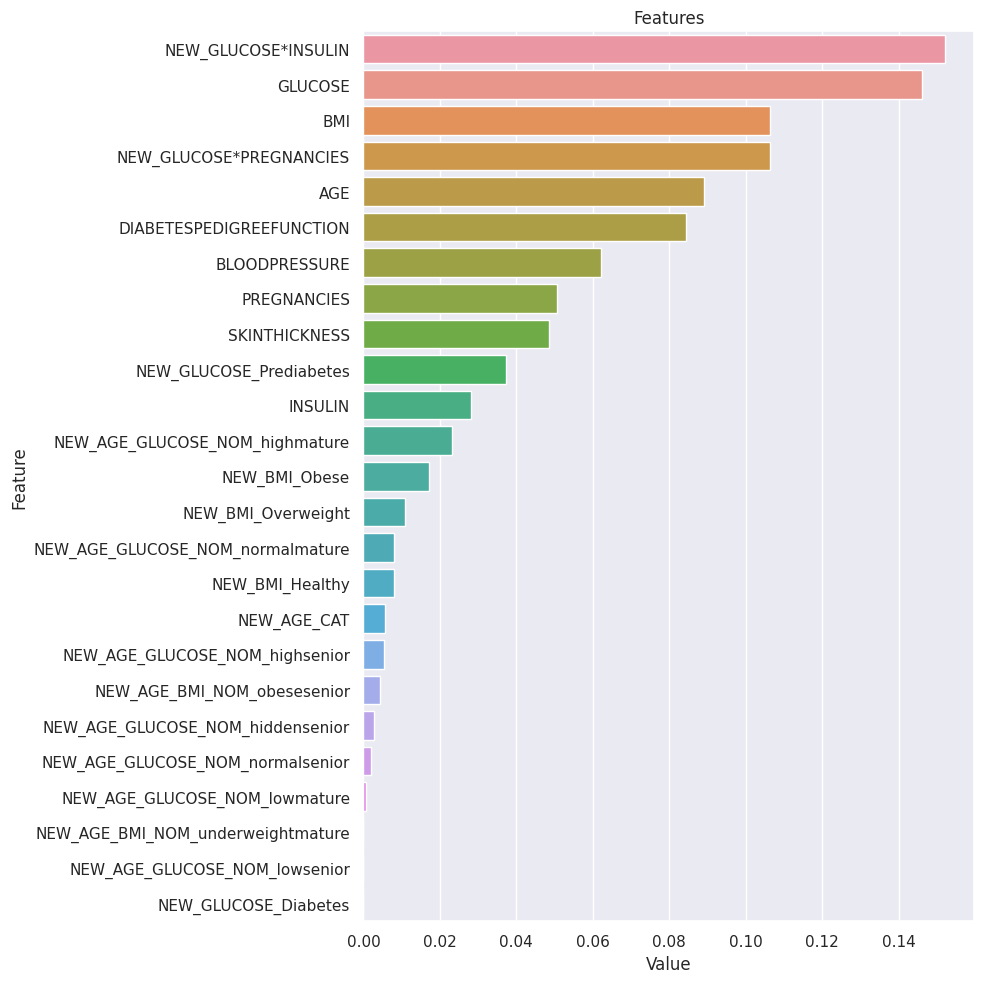

In [45]:
def plot_importance(model, features, num = len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10,10))
    sns.set(font_scale=1)
    sns.barplot(x='Value', y = 'Feature', data = feature_imp.sort_values(by='Value', ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_model, X_train)